In [88]:
import shutil
import random
import numpy as np
import pandas as pd
import cv2
import tifffile as tiff
from pathlib import Path


In [91]:
class ImageData:
    def __init__(self, file_name, cloud_coverage, water_percentage, burned_percentage):
        self.file_name = file_name
        self.cloud_coverage = cloud_coverage
        self.water_percentage = water_percentage
        self.burned_percentage = burned_percentage

    def __repr__(self):
        return f"FileName: {self.file_name}, CloudCoverage: {self.cloud_coverage}, WaterPercentage: {self.water_percentage}, BurnedPercentage: {self.burned_percentage}"

class Candidate:
    def __init__(self, bbox_num, base_image, to_test_images):
        self.bbox_num = bbox_num
        self.base_image = base_image
        self.to_test_images = to_test_images

def get_burned_percentage(file_name):
    burned_mask = cv2.imread('/Users/taylortang/Life-at-UniMelb/Semester_4/COMP90055_Research/Datasets/universal/universal_512_final_final/all_masks/' + file_name)
    burned_mask = cv2.cvtColor(burned_mask, cv2.COLOR_BGR2GRAY)

    # more than 127 is burend, get burned are percentage
    burned_percentage = np.count_nonzero(burned_mask > 127) / burned_mask.size * 100
    return burned_percentage

def get_candidates(bbox_dict, noise_level):
    candidates = []
    for k, v in bbox_dict.items():

        # get the first 4 images
        first_4_images = v[:4]

        # get the images with 0 cloud coverage and 0 water percentage
        filtered_image = [x for x in first_4_images if x.cloud_coverage <= noise_level and x.water_percentage <= noise_level]

        # pick the one with the lowest burned percentage, if there are multiple, pick the last one
        if len(filtered_image) > 0:
            res = None

            # set a max value
            lowest_burned_percentage = 100

            for image in filtered_image:
                if image.burned_percentage < lowest_burned_percentage:
                    lowest_burned_percentage = image.burned_percentage
                    res = image

        else:
            res = None

        if res is not None:

            # find the images from the selected image and onwards

            # get the index of the selected image
            index = v.index(res)

            # get the images from the selected image and onwards (exclude the selected image)
            to_test_images = v[index + 1:]

            # zero cloud and zero water
            to_test_images_zero_cloud_zero_water = [x for x in to_test_images if x.cloud_coverage == 0 and x.water_percentage == 0]

            # create a candidate object
            candidate = Candidate(k, res, to_test_images_zero_cloud_zero_water)

            # add the candidate to the list
            candidates.append(candidate)

            # print(k, res)
    return candidates

In [ ]:
# # Read the CSV file
# df = pd.read_csv('/Users/taylortang/Life-at-UniMelb/Semester_4/COMP90055_Research/Datasets/universal/cloud_water_exclude87to114.csv')

# # List to store all objects
# data_objects = []

# # Create an object for each row and append to the list
# for index, row in df.iterrows():

#     file_name = row['image_file_name_column']
#     cloud_coverage = row['cloud_coverage_column']
#     water_percentage = row['water_percentage_column']
#     burned_percentage = get_burned_percentage(file_name)

#     data_obj = ImageData(row['image_file_name_column'], row['cloud_coverage_column'], row['water_percentage_column'], burned_percentage)
#     data_objects.append(data_obj)

# # now the data_objects contains all images with their cloud coverage, water percentage and burned percentage
# # we need to choose total 75 validation images, 15 for each noise level

# # noise level:
# # 0: contains only 0 cloud coverage and with none-0 burned percentage
# # 25: contains only 25 cloud coverage and with none-0 burned percentage
# # 50: contains only 50 cloud coverage and with none-0 burned percentage
# # 75: contains only 75 cloud coverage and with none-0 burned percentage
# # 100: contains only 100 cloud coverage and with none-0 burned percentage

# validation_images = []

# # get the images with 0 cloud coverage and a none-0 burned percentage
# cloud_0_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 0 and x.burned_percentage > 0]
# print("0 cloud, some burned: ", len(cloud_0_burned_not_0))

# # get the images with 25 cloud coverage and a none-0 burned percentage
# cloud_25_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 25 and x.burned_percentage > 0]
# print("25 cloud, some burned: ", len(cloud_25_burned_not_0))

# # get the images with 50 cloud coverage and a none-0 burned percentage
# cloud_50_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 50 and x.burned_percentage > 0]
# print("50 cloud, some burned: ", len(cloud_50_burned_not_0))

# # get the images with 75 cloud coverage and a none-0 burned percentage
# cloud_75_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 75 and x.burned_percentage > 0]
# print("75 cloud, some burned: ", len(cloud_75_burned_not_0))

# # get the images with 100 cloud coverage and a none-0 burned percentage
# cloud_100_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 100 and x.burned_percentage > 0]
# print("100 cloud, some burned: ", len(cloud_100_burned_not_0))

# print("Total validation images: ", sum([len(cloud_0_burned_not_0), len(cloud_25_burned_not_0), len(cloud_50_burned_not_0), len(cloud_75_burned_not_0), len(cloud_100_burned_not_0)]))



# # # randomly choose x images, add to the validation_images, x equal to 0.2 * this kind of images
# random.seed(1)

# validation_images.extend(random.sample(cloud_0_burned_not_0, int(0.15*len(cloud_0_burned_not_0))))
# print("Validation images: ", len(validation_images))

# validation_images.extend(random.sample(cloud_25_burned_not_0, int(0.15*len(cloud_25_burned_not_0))))
# print("Validation images: ", len(validation_images))

# validation_images.extend(random.sample(cloud_50_burned_not_0, int(0.15*len(cloud_50_burned_not_0))))
# print("Validation images: ", len(validation_images))

# validation_images.extend(random.sample(cloud_75_burned_not_0, int(0.15*len(cloud_75_burned_not_0))))
# print("Validation images: ", len(validation_images))

# validation_images.extend(random.sample(cloud_100_burned_not_0, int(0.15*len(cloud_100_burned_not_0))))
# print("Validation images: ", len(validation_images))


In [ ]:
# # Read the CSV file
# df = pd.read_csv('/Users/taylortang/Life-at-UniMelb/Semester_4/COMP90055_Research/Datasets/universal/cloud_water.csv')

# # List to store all objects
# data_objects = []

# # Create an object for each row and append to the list
# for index, row in df.iterrows():

#     file_name = row['image_file_name_column']
#     cloud_coverage = row['cloud_coverage_column']
#     water_percentage = row['water_percentage_column']
#     burned_percentage = get_burned_percentage(file_name)

#     # sample image file name = bbox_87_2019-12-20_to_2019-12-25_0.jpeg

#     # check bbox range
#     # bbox_num = int(file_name.split('_')[1])
#     # if bbox_num <= 114:


#     data_obj = ImageData(row['image_file_name_column'], row['cloud_coverage_column'], row['water_percentage_column'], burned_percentage)
#     data_objects.append(data_obj)

# # now the data_objects contains all images with their cloud coverage, water percentage and burned percentage
# # we need to choose total 75 validation images, 15 for each noise level

# # noise level:
# # 0: contains only 0 cloud coverage and with none-0 burned percentage
# # 25: contains only 25 cloud coverage and with none-0 burned percentage
# # 50: contains only 50 cloud coverage and with none-0 burned percentage
# # 75: contains only 75 cloud coverage and with none-0 burned percentage
# # 100: contains only 100 cloud coverage and with none-0 burned percentage

# validation_images = []

# # get the images with 0 cloud coverage 
# cloud_0_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 0]
# print("0 cloud: ", len(cloud_0_burned_not_0), "percentage: ", len(cloud_0_burned_not_0)/len(data_objects))

# # get the images with 25 cloud coverage 
# cloud_25_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 25]
# print("25 cloud: ", len(cloud_25_burned_not_0), "percentage: ", len(cloud_25_burned_not_0)/len(data_objects))

# # get the images with 50 cloud coverage 
# cloud_50_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 50]
# print("50 cloud: ", len(cloud_50_burned_not_0), "percentage: ", len(cloud_50_burned_not_0)/len(data_objects))

# # get the images with 75 cloud coverage
# cloud_75_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 75]
# print("75 cloud: ", len(cloud_75_burned_not_0), "percentage: ", len(cloud_75_burned_not_0)/len(data_objects))

# # get the images with 100 cloud coverage
# cloud_100_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 100]
# print("100 cloud: ", len(cloud_100_burned_not_0), "percentage: ", len(cloud_100_burned_not_0)/len(data_objects))

# print("Total validation images: ", sum([len(cloud_0_burned_not_0), len(cloud_25_burned_not_0), len(cloud_50_burned_not_0), len(cloud_75_burned_not_0), len(cloud_100_burned_not_0)]))



# # # randomly choose x images, add to the validation_images, x equal to 0.2 * this kind of images
# random.seed(1)

# validation_images.extend(random.sample(cloud_0_burned_not_0, int(0.15*len(cloud_0_burned_not_0))))
# print("Validation images: ", len(validation_images))

# validation_images.extend(random.sample(cloud_25_burned_not_0, int(0.15*len(cloud_25_burned_not_0))))
# print("Validation images: ", len(validation_images))

# validation_images.extend(random.sample(cloud_50_burned_not_0, int(0.15*len(cloud_50_burned_not_0))))
# print("Validation images: ", len(validation_images))

# validation_images.extend(random.sample(cloud_75_burned_not_0, int(0.15*len(cloud_75_burned_not_0))))
# print("Validation images: ", len(validation_images))

# validation_images.extend(random.sample(cloud_100_burned_not_0, int(0.15*len(cloud_100_burned_not_0))))
# print("Validation images: ", len(validation_images))


# # 0: 0.4574898785425101
# # 25:  0.20850202429149797
# # 50:  0.12753036437246965
# # 75:  0.12753036437246965
# # 100:  0.07894736842105263

In [104]:
# Read the CSV file
df = pd.read_csv('/Users/taylortang/Life-at-UniMelb/Semester_4/COMP90055_Research/Datasets/universal/cloud_water.csv')

# List to store all objects
data_objects = []

# test set bbox list
test_bbox_list = [102, 103, 117, 129, 130, 132, 148]

# Create an object for each row and append to the list
for index, row in df.iterrows():

    file_name = row['image_file_name_column']
    cloud_coverage = row['cloud_coverage_column']
    water_percentage = row['water_percentage_column']
    burned_percentage = get_burned_percentage(file_name)

    # sample image file name = bbox_87_2019-12-20_to_2019-12-25_0.jpeg

    data_obj = ImageData(row['image_file_name_column'], row['cloud_coverage_column'], row['water_percentage_column'], burned_percentage)
    data_objects.append(data_obj)

# now the data_objects contains all images with their cloud coverage, water percentage and burned percentage
# we need to choose total 75 validation images, 15 for each noise level

# noise level:
# 0: 
# 25:
# 50: 
# 75: 
# 100: 

test_images = []
validation_images = []
train_images = []
remaining_images = []


for data_obj in data_objects:
    bbox_num = int(data_obj.file_name.split('_')[1])
    if bbox_num in test_bbox_list:
        test_images.append(data_obj)



# get the images with 0 cloud coverage 
test_image_0_cloud = [x for x in test_images if x.cloud_coverage == 0]
print("0 cloud: ", len(test_image_0_cloud), "percentage: ", len(test_image_0_cloud)/len(test_images))

test_image_25_cloud = [x for x in test_images if x.cloud_coverage == 25]
print("25 cloud: ", len(test_image_25_cloud), "percentage: ", len(test_image_25_cloud)/len(test_images))

test_image_50_cloud = [x for x in test_images if x.cloud_coverage == 50]
print("50 cloud: ", len(test_image_50_cloud), "percentage: ", len(test_image_50_cloud)/len(test_images))

test_image_75_cloud = [x for x in test_images if x.cloud_coverage == 75]
print("75 cloud: ", len(test_image_75_cloud), "percentage: ", len(test_image_75_cloud)/len(test_images))

test_image_100_cloud = [x for x in test_images if x.cloud_coverage == 100]
print("100 cloud: ", len(test_image_100_cloud), "percentage: ", len(test_image_100_cloud)/len(test_images))

print("Total test images: ", sum([len(test_image_0_cloud), len(test_image_25_cloud), len(test_image_50_cloud), len(test_image_75_cloud), len(test_image_100_cloud)]))


print("")
# remove the test images from the data_objects
for obj in test_images:
    data_objects.remove(obj)

# get the images with 0 cloud coverage 
cloud_0_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 0]
print("0 cloud: ", len(cloud_0_burned_not_0), "percentage: ", len(cloud_0_burned_not_0)/len(data_objects))

# get the images with 25 cloud coverage 
cloud_25_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 25]
print("25 cloud: ", len(cloud_25_burned_not_0), "percentage: ", len(cloud_25_burned_not_0)/len(data_objects))

# get the images with 50 cloud coverage 
cloud_50_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 50]
print("50 cloud: ", len(cloud_50_burned_not_0), "percentage: ", len(cloud_50_burned_not_0)/len(data_objects))

# get the images with 75 cloud coverage
cloud_75_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 75]
print("75 cloud: ", len(cloud_75_burned_not_0), "percentage: ", len(cloud_75_burned_not_0)/len(data_objects))

# get the images with 100 cloud coverage
cloud_100_burned_not_0 = [x for x in data_objects if x.cloud_coverage == 100]
print("100 cloud: ", len(cloud_100_burned_not_0), "percentage: ", len(cloud_100_burned_not_0)/len(data_objects))

print("Total validation images: ", sum([len(cloud_0_burned_not_0), len(cloud_25_burned_not_0), len(cloud_50_burned_not_0), len(cloud_75_burned_not_0), len(cloud_100_burned_not_0)]))


# # randomly choose x images, add to the validation_images, x equal to 0.2 * this kind of images
random.seed(1)

validation_images.extend(random.sample(cloud_0_burned_not_0, int(0.18*len(cloud_0_burned_not_0))))
print("Validation images: ", len(validation_images))

validation_images.extend(random.sample(cloud_25_burned_not_0, int(0.18*len(cloud_25_burned_not_0))))
print("Validation images: ", len(validation_images))

validation_images.extend(random.sample(cloud_50_burned_not_0, int(0.18*len(cloud_50_burned_not_0))))
print("Validation images: ", len(validation_images))

validation_images.extend(random.sample(cloud_75_burned_not_0, int(0.18*len(cloud_75_burned_not_0))))
print("Validation images: ", len(validation_images))

validation_images.extend(random.sample(cloud_100_burned_not_0, int(0.18*len(cloud_100_burned_not_0))))
print("Validation images: ", len(validation_images))

# remove the validation images from the data_objects
for obj in validation_images:
    data_objects.remove(obj)

train_images = data_objects

# check the remaining images
print("Test images: ", len(test_images))
print("Validation images: ", len(validation_images))
print("Training images: ", len(train_images))

# 0: 0.4574898785425101
# 25:  0.20850202429149797
# 50:  0.12753036437246965
# 75:  0.12753036437246965
# 100:  0.07894736842105263

0 cloud:  32 percentage:  0.4266666666666667
25 cloud:  18 percentage:  0.24
50 cloud:  8 percentage:  0.10666666666666667
75 cloud:  8 percentage:  0.10666666666666667
100 cloud:  9 percentage:  0.12
Total test images:  75

0 cloud:  194 percentage:  0.4630071599045346
25 cloud:  85 percentage:  0.20286396181384247
50 cloud:  55 percentage:  0.13126491646778043
75 cloud:  55 percentage:  0.13126491646778043
100 cloud:  30 percentage:  0.07159904534606205
Total validation images:  419
Validation images:  34
Validation images:  49
Validation images:  58
Validation images:  67
Validation images:  72
Test images:  75
Validation images:  72
Training images:  347


In [106]:
# check folder and contents

root_folder = Path('/Users/taylortang/Life-at-UniMelb/Semester_4/COMP90055_Research/Datasets/universal/universal_512_final_final')

all_masks_folder = root_folder / 'all_masks'
all_annotations_folder = root_folder / 'all_annotations'
all_images_folder = root_folder / 'all_images'
all_tiffs_folder = root_folder / 'all_tiffs'

train_dataset = root_folder / 'train_dataset'

train_dataset_all_annotations = train_dataset / 'annotations'
train_dataset_train_annotations = train_dataset_all_annotations / 'train_annotations'
train_dataset_val_annotations = train_dataset_all_annotations / 'val_annotations'
train_dataset_test_annotations = train_dataset_all_annotations / 'test_annotations'

train_dataset_all_images = train_dataset / 'images'
train_dataset_train_images = train_dataset_all_images / 'train_images'
train_dataset_val_images = train_dataset_all_images / 'val_images'
train_dataset_test_images = train_dataset_all_images / 'test_images'

train_dataset_all_masks = train_dataset / 'masks'
train_dataset_train_masks = train_dataset_all_masks / 'train_masks'
train_dataset_val_masks = train_dataset_all_masks / 'val_masks'
train_dataset_test_masks = train_dataset_all_masks / 'test_masks'

train_dataset_all_tiffs = train_dataset / 'tiffs'
train_dataset_train_tiffs = train_dataset_all_tiffs / 'train_tiffs'
train_dataset_val_tiffs = train_dataset_all_tiffs / 'val_tiffs'
train_dataset_test_tiffs = train_dataset_all_tiffs / 'test_tiffs'

# validate the folder structure
assert all_masks_folder.exists()
assert all_annotations_folder.exists()
assert all_tiffs_folder.exists()
assert train_dataset.exists()
assert train_dataset_all_annotations.exists()
assert train_dataset_train_annotations.exists()
assert train_dataset_val_annotations.exists()
assert train_dataset_test_annotations.exists()
assert train_dataset_all_images.exists()
assert train_dataset_train_images.exists()
assert train_dataset_val_images.exists()
assert train_dataset_test_images.exists()
assert train_dataset_all_masks.exists()
assert train_dataset_train_masks.exists()
assert train_dataset_val_masks.exists()
assert train_dataset_test_masks.exists()
assert train_dataset_all_tiffs.exists()
assert train_dataset_train_tiffs.exists()
assert train_dataset_val_tiffs.exists()
assert train_dataset_test_tiffs.exists()

# check if all images have corresponding masks and annotations
all_images_list = list(all_images_folder.glob('*.jpeg'))
all_masks_list = list(all_masks_folder.glob('*.jpeg'))
all_annotations_list = list(all_annotations_folder.glob('*.txt'))
all_tiffs_list = list(all_tiffs_folder.glob("*.tiff"))

print(len(all_images_list))
print(len(all_masks_list))
print(len(all_annotations_list))
print(len(all_tiffs_list))

for image in all_images_list:
    assert (all_masks_folder / image.name).exists()
    assert (all_annotations_folder / image.name.replace('.jpeg', '.txt')).exists()
    assert (all_tiffs_folder / image.name.replace('.jpeg', '.tiff')).exists()
    

494
494
494
494


In [108]:
# sanity check done, now move files based on previously defined train, val, test images

# convert to path list
print(type(test_images[0]))

proposed_test_images_list = [x.file_name for x in test_images]
proposed_validation_images_list = [x.file_name for x in validation_images]
proposed_train_images_list = [x.file_name for x in train_images]

# print(proposed_test_images_list[0])

# print(all_images_list[1].name)

# print(len(proposed_test_images_list))
# print(len(proposed_validation_images_list))
# print(len(proposed_train_images_list))

# print(all_images_list[1].name in proposed_test_images_list)
# print(all_images_list[1].name in proposed_validation_images_list)
# print(all_images_list[1].name in proposed_train_images_list)

# print(sorted(proposed_train_images_list)[33])

# assert sorted(proposed_train_images_list)[33] == all_images_list[1].name


<class '__main__.ImageData'>


In [109]:
# move images
for image in all_images_list:
    if image.name in proposed_test_images_list:
        shutil.move(str(image), train_dataset_test_images)
    elif image.name in proposed_validation_images_list:
        shutil.move(str(image), train_dataset_val_images)
    elif image.name in proposed_train_images_list:
        shutil.move(str(image), train_dataset_train_images)
    else:
        print("Error ", image.name)

In [110]:
# move masks
for mask in all_masks_list:
    if mask.name in proposed_test_images_list:
        shutil.move(str(mask), train_dataset_test_masks)
    elif mask.name in proposed_validation_images_list:
        shutil.move(str(mask), train_dataset_val_masks)
    elif mask.name in proposed_train_images_list:
        shutil.move(str(mask), train_dataset_train_masks)
    else:
        print("Error ", mask.name)

In [111]:
# move annotations
for annotation in all_annotations_list:
    if annotation.name.replace('.txt', '.jpeg') in proposed_test_images_list:
        shutil.move(str(annotation), train_dataset_test_annotations)
    elif annotation.name.replace('.txt', '.jpeg') in proposed_validation_images_list:
        shutil.move(str(annotation), train_dataset_val_annotations)
    elif annotation.name.replace('.txt', '.jpeg') in proposed_train_images_list:
        shutil.move(str(annotation), train_dataset_train_annotations)
    else:
        print("Error ", annotation.name)


In [112]:

# move tiffs
for tiff in all_tiffs_list:
    if tiff.name.replace('.tiff', '.jpeg') in proposed_test_images_list:
        shutil.move(str(tiff), train_dataset_test_tiffs)
    elif tiff.name.replace('.tiff', '.jpeg') in proposed_validation_images_list:
        shutil.move(str(tiff), train_dataset_val_tiffs)
    elif tiff.name.replace('.tiff', '.jpeg') in proposed_train_images_list:
        shutil.move(str(tiff), train_dataset_train_tiffs)
    else:
        print("Error ", tiff.name)

In [113]:
# now the distribution process is done, each folder contains the same number of images

# lets do a sanity check


# get the file name of all the images in the train_dataset_train_images folder
train_dataset_train_images_file_stem_list = [x.stem for x in list(train_dataset_train_images.glob('*.jpeg'))]

# get the file name of all the images in the val_dataset_val_images folder
train_dataset_val_images_file_stem_list = [x.stem for x in list(train_dataset_val_images.glob('*.jpeg'))]

# get the file name of all the images in the test_dataset_test_images folder
train_dataset_test_images_file_stem_list = [x.stem for x in list(train_dataset_test_images.glob('*.jpeg'))]

# get the file name of all the masks in the train_dataset_train_masks folder
train_dataset_train_masks_file_stem_list = [x.stem for x in list(train_dataset_train_masks.glob('*.jpeg'))]

# get the file name of all the masks in the val_dataset_val_masks folder
train_dataset_val_masks_file_stem_list = [x.stem for x in list(train_dataset_val_masks.glob('*.jpeg'))]

# get the file name of all the masks in the test_dataset_test_masks folder
train_dataset_test_masks_file_stem_list = [x.stem for x in list(train_dataset_test_masks.glob('*.jpeg'))]

# get the file name of all the annotations in the train_dataset_train_annotations folder
train_dataset_train_annotations_file_stem_list = [x.stem for x in list(train_dataset_train_annotations.glob('*.txt'))]

# get the file name of all the annotations in the val_dataset_val_annotations folder
train_dataset_val_annotations_file_stem_list = [x.stem for x in list(train_dataset_val_annotations.glob('*.txt'))]

# get the file name of all the annotations in the test_dataset_test_annotations folder
train_dataset_test_annotations_file_stem_list = [x.stem for x in list(train_dataset_test_annotations.glob('*.txt'))]

# get the file name of all the tiffs in the train_dataset_train_tiffs folder
train_dataset_train_tiffs_file_stem_list = [x.stem for x in list(train_dataset_train_tiffs.glob('*.tiff'))]

# get the file name of all the tiffs in the val_dataset_val_tiffs folder
train_dataset_val_tiffs_file_stem_list = [x.stem for x in list(train_dataset_val_tiffs.glob('*.tiff'))]

# get the file name of all the tiffs in the test_dataset_test_tiffs folder
train_dataset_test_tiffs_file_stem_list = [x.stem for x in list(train_dataset_test_tiffs.glob('*.tiff'))]



train_dataset_train_images_file_stem_list.sort()
train_dataset_train_annotations_file_stem_list.sort()
train_dataset_train_tiffs_file_stem_list.sort()
train_dataset_train_masks_file_stem_list.sort()


# check if the train_dataset_train_images_file_stem_list is the same length as train_dataset_train_masks_file_stem_list
assert len(train_dataset_train_images_file_stem_list) == len(train_dataset_train_masks_file_stem_list)
assert len(train_dataset_train_images_file_stem_list) == len(train_dataset_train_annotations_file_stem_list)
assert len(train_dataset_train_images_file_stem_list) == len(train_dataset_train_tiffs_file_stem_list)

# check if the train_dataset_train_images_file_stem_list is the same file name as train_dataset_train_masks_file_stem_list
assert train_dataset_train_images_file_stem_list == train_dataset_train_masks_file_stem_list
assert train_dataset_train_images_file_stem_list == train_dataset_train_annotations_file_stem_list
assert train_dataset_train_images_file_stem_list == train_dataset_train_tiffs_file_stem_list

# check if the train_dataset_val_images_file_stem_list is the same length as train_dataset_val_masks_file_stem_list
assert len(train_dataset_val_images_file_stem_list) == len(train_dataset_val_masks_file_stem_list)
assert len(train_dataset_val_images_file_stem_list) == len(train_dataset_val_annotations_file_stem_list)
assert len(train_dataset_val_images_file_stem_list) == len(train_dataset_val_tiffs_file_stem_list)

# sort
train_dataset_val_images_file_stem_list.sort()
train_dataset_val_masks_file_stem_list.sort()
train_dataset_val_annotations_file_stem_list.sort()
train_dataset_val_tiffs_file_stem_list.sort()

# check if the train_dataset_val_images_file_stem_list is the same file name as train_dataset_val_masks_file_stem_list
assert train_dataset_val_images_file_stem_list == train_dataset_val_masks_file_stem_list
assert train_dataset_val_images_file_stem_list == train_dataset_val_annotations_file_stem_list
assert train_dataset_val_images_file_stem_list == train_dataset_val_tiffs_file_stem_list

# check if the train_dataset_test_images_file_stem_list is the same length as train_dataset_test_masks_file_stem_list
assert len(train_dataset_test_images_file_stem_list) == len(train_dataset_test_masks_file_stem_list)
assert len(train_dataset_test_images_file_stem_list) == len(train_dataset_test_annotations_file_stem_list)
assert len(train_dataset_test_images_file_stem_list) == len(train_dataset_test_tiffs_file_stem_list)

# sort
train_dataset_test_images_file_stem_list.sort()
train_dataset_test_masks_file_stem_list.sort()
train_dataset_test_annotations_file_stem_list.sort()
train_dataset_test_tiffs_file_stem_list.sort()

# check if the train_dataset_test_images_file_stem_list is the same file name as train_dataset_test_masks_file_stem_list
assert train_dataset_test_images_file_stem_list == train_dataset_test_masks_file_stem_list
assert train_dataset_test_images_file_stem_list == train_dataset_test_annotations_file_stem_list
assert train_dataset_test_images_file_stem_list == train_dataset_test_tiffs_file_stem_list



In [117]:
# sanity check done
# now, lets do data augmentation
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import cv2
import albumentations as A
import tifffile as tiff
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Paths to image and its corresponding mask
root_path = Path('/Users/taylortang/Life-at-UniMelb/Semester_4/COMP90055_Research/Datasets/universal/universal_512_final_final/train_dataset')
sample_image = root_path / 'images' / 'test_images' / 'bbox_102_2020-01-09_to_2020-01-14_0.jpeg'
sample_mask = root_path / 'masks' / 'test_masks' / 'bbox_102_2020-01-09_to_2020-01-14_0.jpeg'
sample_annotation = root_path / 'annotations' / 'test_annotations' / 'bbox_102_2020-01-09_to_2020-01-14_0.txt'
sample_tiff = root_path / 'tiffs' / 'test_tiffs' / 'bbox_102_2020-01-09_to_2020-01-14_0.tiff'

# assert sample exist
assert sample_image.exists()
assert sample_mask.exists()
assert sample_annotation.exists()
assert sample_tiff.exists()

In [118]:
def rotate_img(image_file, degree):
    with Image.open(image_file) as img:
        rotated_img = img.rotate(degree, expand=True)
    return rotated_img

def rotate_sm(mask_file, degree):
    return rotate_img(mask_file, degree)  

def load_txt(txt_file):
    with open(txt_file, 'r') as f:
        lines = f.readlines()
    return lines

def rotate_ano(annotation_txt, degrees, image_width=1, image_height=1):
    rotated_annotations = []
    
    for line in annotation_txt:
        parts = line.strip().split()
        class_id = parts[0]
        points = [float(p) for p in parts[1:]]

        rotated_points = []
        for i in range(0, len(points), 2):
            x, y = points[i], points[i+1]

            # Rotate based on specified degrees
            if degrees == 90:
                new_x = y
                new_y = image_width - x
            elif degrees == 180:
                new_x = image_width - x
                new_y = image_height - y
            elif degrees == 270:
                new_x = image_height - y
                new_y = x
            else:
                raise ValueError("Invalid rotation degrees. Must be 90, 180, or 270.")
                
            rotated_points.extend([new_x, new_y])

        rotated_line = [class_id] + list(map(str, rotated_points))
        rotated_annotations.append(' '.join(rotated_line))

    return rotated_annotations


def rotate_tif(tiff_file, degree):
    with tiff.TiffFile(tiff_file) as tif:
        arr = tif.asarray()

    rotated_arr = np.rot90(arr, k=degree//90)

    return rotated_arr



In [119]:
image_rotated = rotate_img(sample_image, 90)
mask_rotated = rotate_sm(sample_mask, 90)
txt = load_txt(sample_annotation)
annotation_rotated = rotate_ano(txt, 90)
tiff_rotated = rotate_tif(sample_tiff, 90)


In [120]:
def show_image(img):
    plt.imshow(img)
    plt.axis('off')

def show_mask(mask):
    plt.imshow(mask, cmap='gray')  # Assuming the mask is single-channel
    plt.axis('off')

def show_mask_from_annotations(annotations, image_size=(512, 512)):
    """Shows the mask generated from a list of annotation data."""
    
    # Create an empty mask of the same size as the image
    mask = np.zeros(image_size, dtype=np.uint8)
    
    for annotation in annotations:
        # Exclude the class label at the beginning
        line = annotation.split()
        data = [float(val) for val in line]
        label = data[0]
        points = data[1:]
        polygon = []
        for i in range(0, len(points), 2):
            x = int(points[i] * image_size[0])
            y = int(points[i + 1] * image_size[1])
            polygon.append((x, y))
        # Draw the polygon on the mask
        mask = cv2.fillPoly(mask, [np.array(polygon)], 255)
    
    plt.imshow(mask, cmap='gray')
    plt.axis('off')


def show_tiff(tiff_array, channels=[1,2,3]):  # Default to RGB
    if len(tiff_array.shape) == 3:
        img = tiff_array[:, :, channels]
        img = (img - img.min()) / (img.max() - img.min())  # Normalize for visualization
        plt.imshow(img)
    else:
        plt.imshow(tiff_array, cmap='gray')
    plt.axis('off')


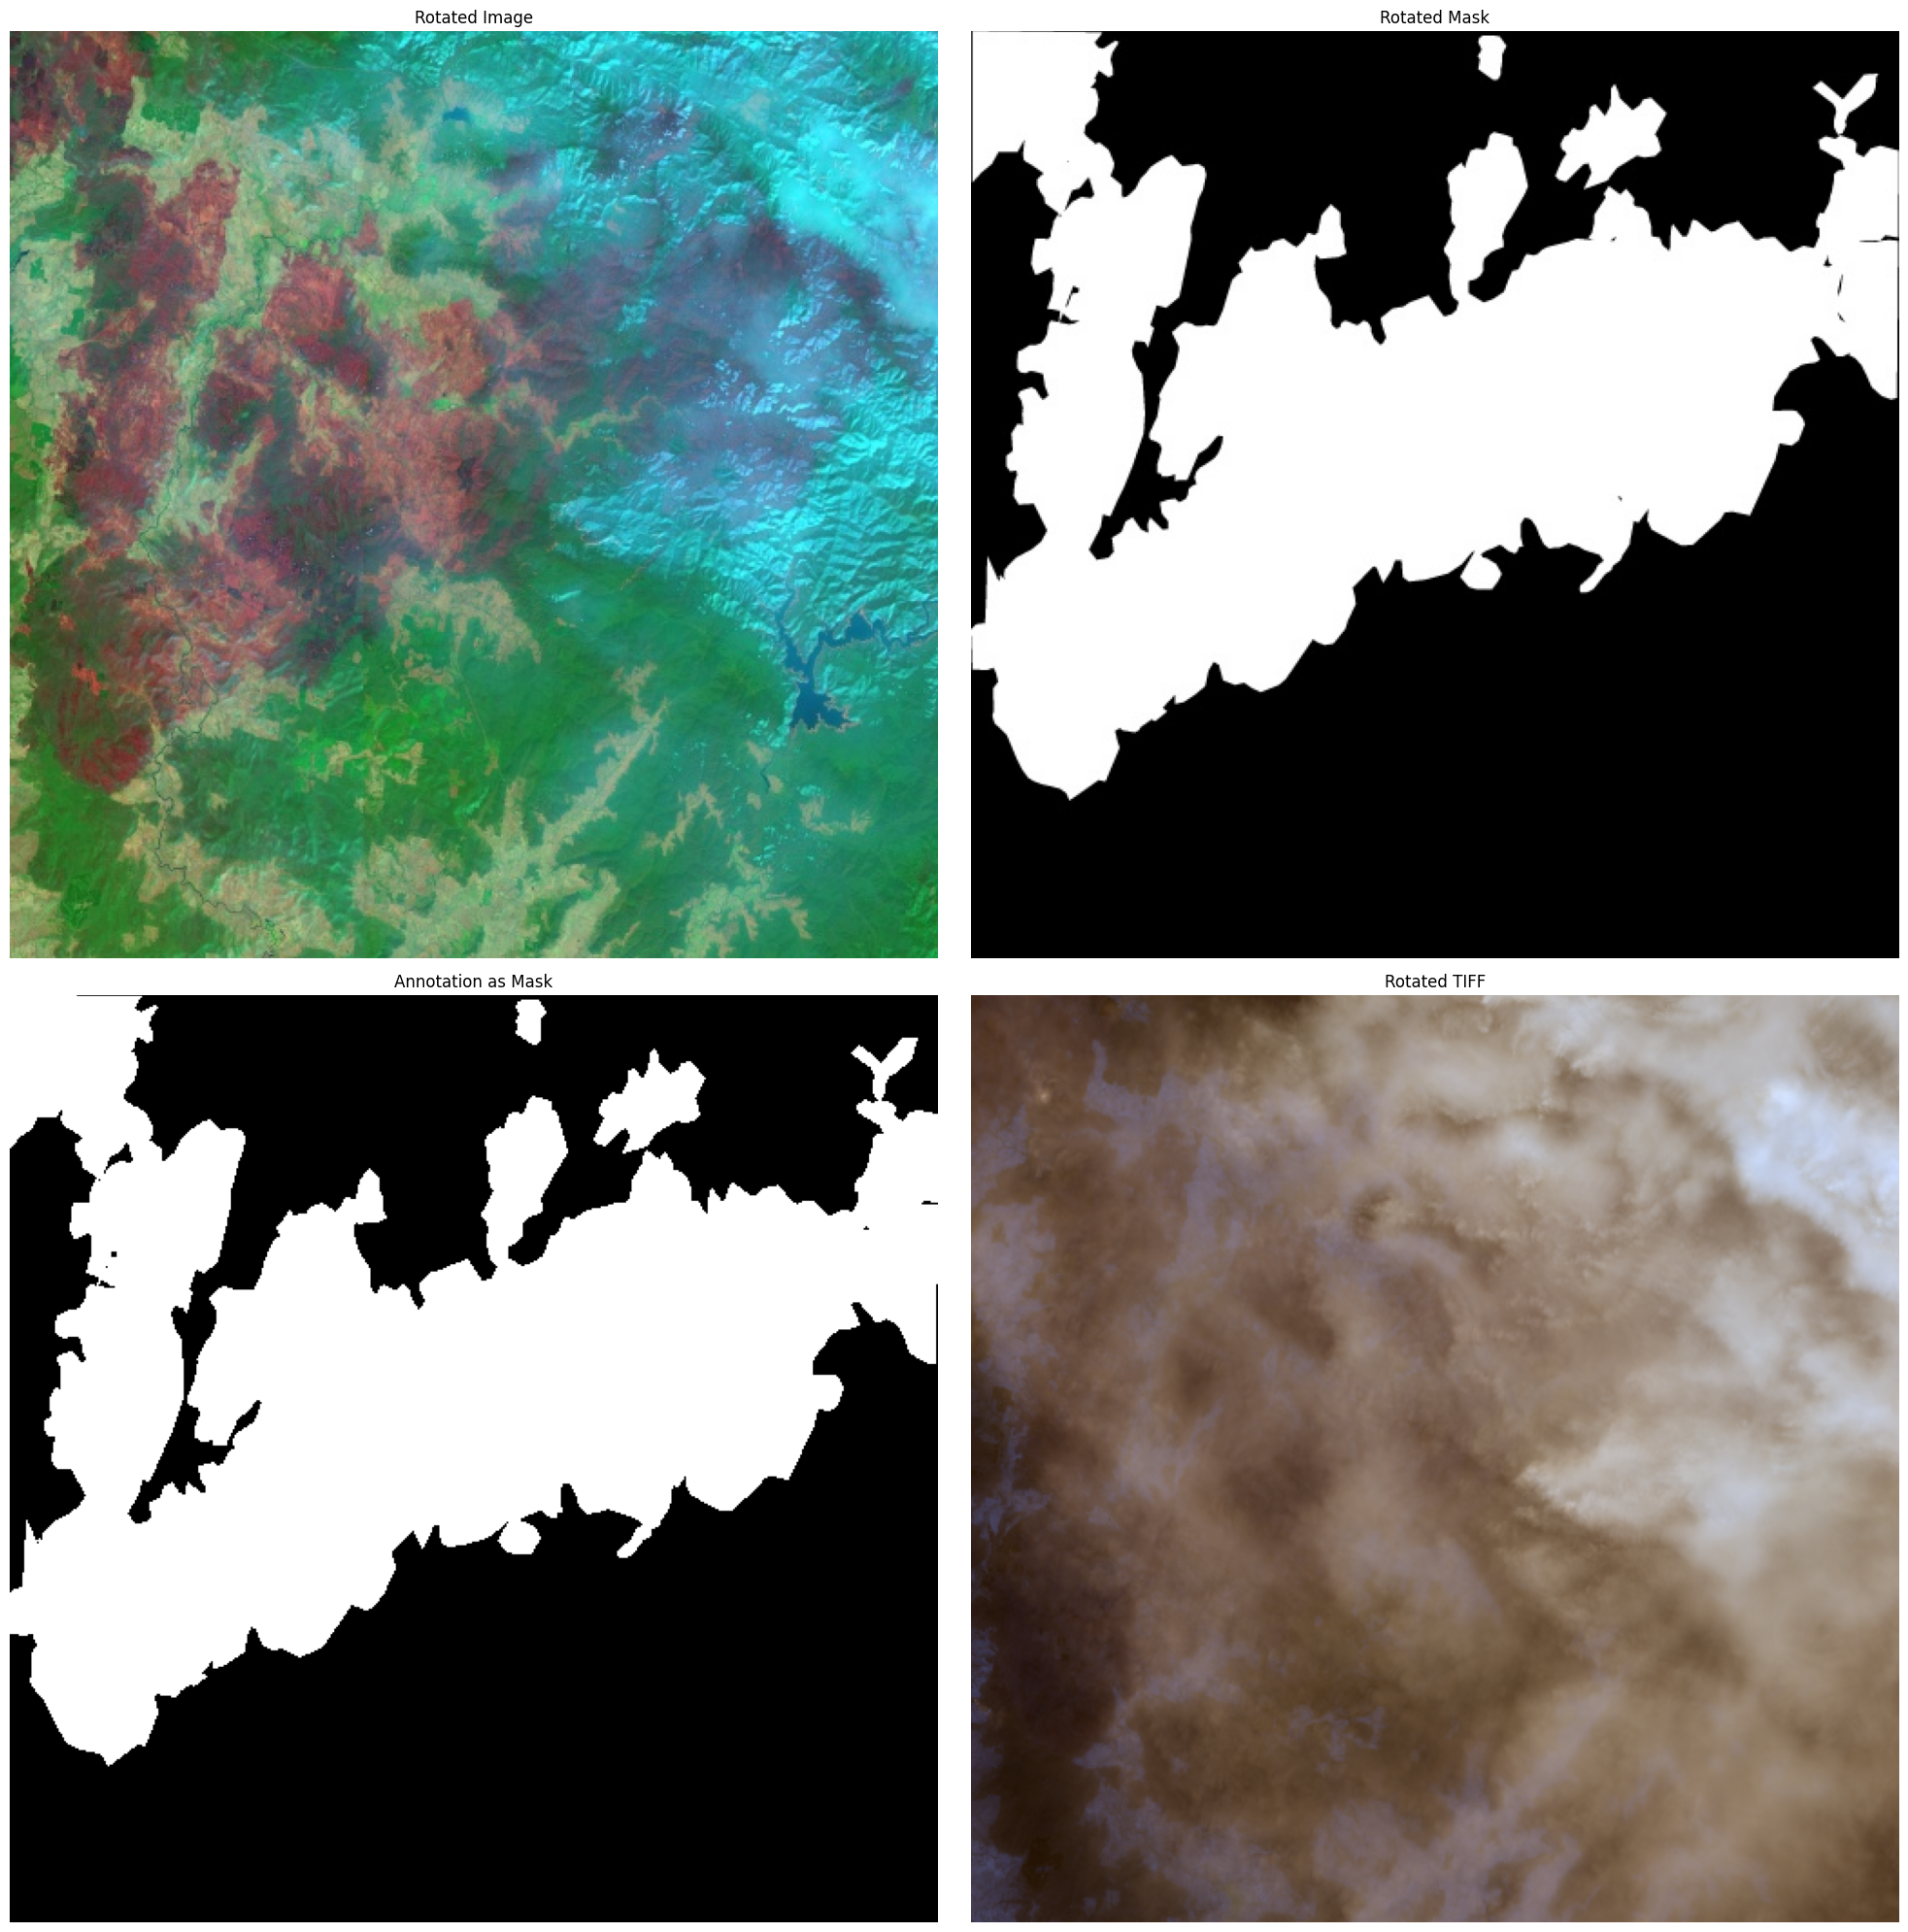

In [121]:
plt.figure(figsize=(20, 20))

# Image
plt.subplot(2, 2, 1)
show_image(image_rotated)
plt.title('Rotated Image')

# Mask
plt.subplot(2, 2, 2)
show_mask(mask_rotated)
plt.title('Rotated Mask')

# Get the shape (height, width) from the Image object
img_shape = image_rotated.size[::-1]

# Annotation as Mask
plt.subplot(2, 2, 3)
show_mask_from_annotations(annotation_rotated)
plt.title('Annotation as Mask')

# TIFF (default to first three channels for RGB)
plt.subplot(2, 2, 4)
show_tiff(tiff_rotated)
plt.title('Rotated TIFF')

plt.tight_layout()
plt.show()


In [152]:
# # save rotated images, masks, annotations and tiffs
# save_path = Path('/Users/taylortang/Life-at-UniMelb/Semester_4/COMP90055_Research/Datasets/universal/universal_512_final/sample')

# image_rotated.save(save_path / 'image_rotated.jpeg')
# mask_rotated.save(save_path / 'mask_rotated.jpeg')
# with open(save_path / 'annotation_rotated.txt', 'w') as f:
#     f.write('\n'.join(annotation_rotated))
# tiff.imwrite(save_path / 'tiff_rotated.tiff', tiff_rotated)

In [122]:
# the sample file works fine now, it is time to do the augmentation for all the images, and save it down

train_file_stems = train_dataset_train_images_file_stem_list
val_file_stems = train_dataset_val_images_file_stem_list
test_file_stems = train_dataset_test_images_file_stem_list

for file in val_file_stems:

    # find the corresponding image, mask, annotation and tiff
    image_file = train_dataset_val_images / (file + '.jpeg')
    mask_file = train_dataset_val_masks / (file + '.jpeg')
    annotation_file = train_dataset_val_annotations / (file + '.txt')
    tiff_file = train_dataset_val_tiffs / (file + '.tiff')

    # assert file exists
    assert image_file.exists()
    assert mask_file.exists()
    assert annotation_file.exists()
    assert tiff_file.exists()

    rotates = [1, 2, 3]

    for rotate in rotates:

        image_rotated = rotate_img(image_file, 90 * rotate)
        mask_rotated = rotate_sm(mask_file, 90 * rotate)
        txt = load_txt(annotation_file)
        annotation_rotated = rotate_ano(txt, 90 * rotate)
        tiff_rotated = rotate_tif(tiff_file, 90 * rotate)

        # save rotated images, masks, annotations and tiffs, new stem is the original file name exclude the last character
        new_stem = file[:-1]+str(rotate)

        image_rotated.save(train_dataset_val_images / (new_stem + '.jpeg'))
        mask_rotated.save(train_dataset_val_masks / (new_stem + '.jpeg'))
        with open(train_dataset_val_annotations / (new_stem + '.txt'), 'w') as f:
            f.write('\n'.join(annotation_rotated))
        tiff.imwrite(train_dataset_val_tiffs / (new_stem + '.tiff'), tiff_rotated)


In [123]:
# do the same for train images

for file in train_file_stems:

    # find the corresponding image, mask, annotation and tiff
    image_file = train_dataset_train_images / (file + '.jpeg')
    mask_file = train_dataset_train_masks / (file + '.jpeg')
    annotation_file = train_dataset_train_annotations / (file + '.txt')
    tiff_file = train_dataset_train_tiffs / (file + '.tiff')

    # assert file exists
    assert image_file.exists()
    assert mask_file.exists()
    assert annotation_file.exists()
    assert tiff_file.exists()

    rotates = [1, 2, 3]

    for rotate in rotates:

        image_rotated = rotate_img(image_file, 90 * rotate)
        mask_rotated = rotate_sm(mask_file, 90 * rotate)
        txt = load_txt(annotation_file)
        annotation_rotated = rotate_ano(txt, 90 * rotate)
        tiff_rotated = rotate_tif(tiff_file, 90 * rotate)

        # save rotated images, masks, annotations and tiffs, new stem is the original file name exclude the last character
        new_stem = file[:-1]+str(rotate)

        image_rotated.save(train_dataset_train_images / (new_stem + '.jpeg'))
        mask_rotated.save(train_dataset_train_masks / (new_stem + '.jpeg'))
        with open(train_dataset_train_annotations / (new_stem + '.txt'), 'w') as f:
            f.write('\n'.join(annotation_rotated))
        tiff.imwrite(train_dataset_train_tiffs / (new_stem + '.tiff'), tiff_rotated)

In [124]:
# same for test
for file in test_file_stems:

    # find the corresponding image, mask, annotation and tiff
    image_file = train_dataset_test_images / (file + '.jpeg')
    mask_file = train_dataset_test_masks / (file + '.jpeg')
    annotation_file = train_dataset_test_annotations / (file + '.txt')
    tiff_file = train_dataset_test_tiffs / (file + '.tiff')

    # assert file exists
    assert image_file.exists()
    assert mask_file.exists()
    assert annotation_file.exists()
    assert tiff_file.exists()

    rotates = [1, 2, 3]

    for rotate in rotates:

        image_rotated = rotate_img(image_file, 90 * rotate)
        mask_rotated = rotate_sm(mask_file, 90 * rotate)
        txt = load_txt(annotation_file)
        annotation_rotated = rotate_ano(txt, 90 * rotate)
        tiff_rotated = rotate_tif(tiff_file, 90 * rotate)

        # save rotated images, masks, annotations and tiffs, new stem is the original file name exclude the last character
        new_stem = file[:-1]+str(rotate)

        image_rotated.save(train_dataset_test_images / (new_stem + '.jpeg'))
        mask_rotated.save(train_dataset_test_masks / (new_stem + '.jpeg'))
        with open(train_dataset_test_annotations / (new_stem + '.txt'), 'w') as f:
            f.write('\n'.join(annotation_rotated))
        tiff.imwrite(train_dataset_test_tiffs / (new_stem + '.tiff'), tiff_rotated)

In [125]:
# sanity check
# now, based on the already distributed images, we need to distribute masks, annotation and tiffs

# first, get all the images in the train_dataset_train_images folder using pathlib
train_dataset_train_images_list = list(train_dataset_train_images.glob('*.jpeg'))
print("train_dataset_train_images_list: ", len(train_dataset_train_images_list))

# get all the images in the train_dataset_val_images folder using pathlib
train_dataset_val_images_list = list(train_dataset_val_images.glob('*.jpeg'))
print("train_dataset_val_images_list: ", len(train_dataset_val_images_list))

# get all the images in the train_dataset_test_images folder using pathlib
train_dataset_test_images_list = list(train_dataset_test_images.glob('*.jpeg'))
print("train_dataset_test_images_list: ", len(train_dataset_test_images_list))

train_dataset_train_images_list:  1388
train_dataset_val_images_list:  288
train_dataset_test_images_list:  300


In [126]:
# get the file name of all the images in the train_dataset_train_images folder
train_dataset_train_images_file_stem_list = [x.stem for x in train_dataset_train_images_list]

# get the file name of all the images in the val_dataset_val_images folder
train_dataset_val_images_file_stem_list = [x.stem for x in train_dataset_val_images_list]

# get the file name of all the images in the test_dataset_test_images folder
train_dataset_test_images_file_stem_list = [x.stem for x in train_dataset_test_images_list]

In [127]:
# now the distribution process is done, each folder contains the same number of images

# lets do a sanity check


# get the file name of all the images in the train_dataset_train_images folder
train_dataset_train_images_file_stem_list = [x.stem for x in list(train_dataset_train_images.glob('*.jpeg'))]

# get the file name of all the images in the val_dataset_val_images folder
train_dataset_val_images_file_stem_list = [x.stem for x in list(train_dataset_val_images.glob('*.jpeg'))]

# get the file name of all the images in the test_dataset_test_images folder
train_dataset_test_images_file_stem_list = [x.stem for x in list(train_dataset_test_images.glob('*.jpeg'))]

# get the file name of all the masks in the train_dataset_train_masks folder
train_dataset_train_masks_file_stem_list = [x.stem for x in list(train_dataset_train_masks.glob('*.jpeg'))]

# get the file name of all the masks in the val_dataset_val_masks folder
train_dataset_val_masks_file_stem_list = [x.stem for x in list(train_dataset_val_masks.glob('*.jpeg'))]

# get the file name of all the masks in the test_dataset_test_masks folder
train_dataset_test_masks_file_stem_list = [x.stem for x in list(train_dataset_test_masks.glob('*.jpeg'))]

# get the file name of all the annotations in the train_dataset_train_annotations folder
train_dataset_train_annotations_file_stem_list = [x.stem for x in list(train_dataset_train_annotations.glob('*.txt'))]

# get the file name of all the annotations in the val_dataset_val_annotations folder
train_dataset_val_annotations_file_stem_list = [x.stem for x in list(train_dataset_val_annotations.glob('*.txt'))]

# get the file name of all the annotations in the test_dataset_test_annotations folder
train_dataset_test_annotations_file_stem_list = [x.stem for x in list(train_dataset_test_annotations.glob('*.txt'))]

# get the file name of all the tiffs in the train_dataset_train_tiffs folder
train_dataset_train_tiffs_file_stem_list = [x.stem for x in list(train_dataset_train_tiffs.glob('*.tiff'))]

# get the file name of all the tiffs in the val_dataset_val_tiffs folder
train_dataset_val_tiffs_file_stem_list = [x.stem for x in list(train_dataset_val_tiffs.glob('*.tiff'))]

# get the file name of all the tiffs in the test_dataset_test_tiffs folder
train_dataset_test_tiffs_file_stem_list = [x.stem for x in list(train_dataset_test_tiffs.glob('*.tiff'))]



train_dataset_train_images_file_stem_list.sort()
train_dataset_train_annotations_file_stem_list.sort()
train_dataset_train_tiffs_file_stem_list.sort()
train_dataset_train_masks_file_stem_list.sort()


# check if the train_dataset_train_images_file_stem_list is the same length as train_dataset_train_masks_file_stem_list
assert len(train_dataset_train_images_file_stem_list) == len(train_dataset_train_masks_file_stem_list)
assert len(train_dataset_train_images_file_stem_list) == len(train_dataset_train_annotations_file_stem_list)
assert len(train_dataset_train_images_file_stem_list) == len(train_dataset_train_tiffs_file_stem_list)

# check if the train_dataset_train_images_file_stem_list is the same file name as train_dataset_train_masks_file_stem_list
assert train_dataset_train_images_file_stem_list == train_dataset_train_masks_file_stem_list
assert train_dataset_train_images_file_stem_list == train_dataset_train_annotations_file_stem_list
assert train_dataset_train_images_file_stem_list == train_dataset_train_tiffs_file_stem_list

# check if the train_dataset_val_images_file_stem_list is the same length as train_dataset_val_masks_file_stem_list
assert len(train_dataset_val_images_file_stem_list) == len(train_dataset_val_masks_file_stem_list)
assert len(train_dataset_val_images_file_stem_list) == len(train_dataset_val_annotations_file_stem_list)
assert len(train_dataset_val_images_file_stem_list) == len(train_dataset_val_tiffs_file_stem_list)

# sort
train_dataset_val_images_file_stem_list.sort()
train_dataset_val_masks_file_stem_list.sort()
train_dataset_val_annotations_file_stem_list.sort()
train_dataset_val_tiffs_file_stem_list.sort()

# check if the train_dataset_val_images_file_stem_list is the same file name as train_dataset_val_masks_file_stem_list
assert train_dataset_val_images_file_stem_list == train_dataset_val_masks_file_stem_list
assert train_dataset_val_images_file_stem_list == train_dataset_val_annotations_file_stem_list
assert train_dataset_val_images_file_stem_list == train_dataset_val_tiffs_file_stem_list

# check if the train_dataset_test_images_file_stem_list is the same length as train_dataset_test_masks_file_stem_list
assert len(train_dataset_test_images_file_stem_list) == len(train_dataset_test_masks_file_stem_list)
assert len(train_dataset_test_images_file_stem_list) == len(train_dataset_test_annotations_file_stem_list)
assert len(train_dataset_test_images_file_stem_list) == len(train_dataset_test_tiffs_file_stem_list)

# sort
train_dataset_test_images_file_stem_list.sort()
train_dataset_test_masks_file_stem_list.sort()
train_dataset_test_annotations_file_stem_list.sort()
train_dataset_test_tiffs_file_stem_list.sort()

# check if the train_dataset_test_images_file_stem_list is the same file name as train_dataset_test_masks_file_stem_list
assert train_dataset_test_images_file_stem_list == train_dataset_test_masks_file_stem_list
assert train_dataset_test_images_file_stem_list == train_dataset_test_annotations_file_stem_list
assert train_dataset_test_images_file_stem_list == train_dataset_test_tiffs_file_stem_list

print("sanity check done")

sanity check done
